# Data Preparation

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import datetime

**Importing data**

The Lending Club Dataset is used for this project: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used the updated dataset (version 2), which is available on kaggle: https://www.kaggle.com/wendykan/lending-club-loan-data/

We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [2]:
loan = r'F:\Data Analysis\Springboard\Data Science Career Track\Projects\Capstone 2\lending club loan data_version 2\loan.csv'

loan_data_backup = pd.read_csv(loan)

loan_data = loan_data_backup.copy()

C:\Users\13134\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Explore Data**

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260663,NaN,NaN,12000,12000,12000.0,60 months,14.08,279.72,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,NaN,NaN,12000,12000,12000.0,60 months,25.82,358.01,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,NaN,NaN,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,NaN,NaN,12000,12000,12000.0,60 months,21.45,327.69,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260667,NaN,NaN,16550,16550,16550.0,60 months,21.45,451.94,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Display all columns
#pd.options.display.max_columns = None
#loan_data

In [6]:
#Display all rows
#pd.options.display.max_rows = None
#loan_data

In [7]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [8]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [9]:
loan_data.dtypes

id                       float64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 145, dtype: object

In [10]:
loan_data.shape

(2260668, 145)

# Data Pre-processing

**Pre-processing few continuous variables: `emp_length`, `earlist_cr_line`, `term`, `issue_d`**

In [11]:
# Display unique values of a column.
loan_data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

The `emp_length` has four things we have to remove to be able to convert it into an integer:
    1.`+ years`
    2.`< 1 year`
    3.`nan`
    4.` years` and `year`  (space years and space year)

In [12]:
#Coverting the employment lenght from object into integer. We will store the new variable as 'employment length int'

# 1.Assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')

# 2Replace the whole string ‘less than 1 year’ with the string ‘0’.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))

# 3.Replace the ‘n/a’ string with the string ‘0’.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))

# 4.Replace the string ‘space years’  and 'space year' with nothing.
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [13]:
# Checks the datatype of a single element of a column.
type(loan_data['emp_length_int'][0])

str

Now we transform it into numeric

In [14]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [15]:
type(loan_data['emp_length_int'][0])

numpy.float64

Next is `earliest credit line`

In [16]:
# Next is 'earliest credit line'
#loan_data['earliest_cr_line']

In [17]:
type(loan_data['earliest_cr_line'][0])

str

In [18]:
# 'earliest credit line' is a date variable. We can extracts the date and the time from a string variable that is in a given format.
#loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format= '%b-%Y')

#loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line'].apply(pd.to_datetime)

loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], infer_datetime_format=True)


In [19]:
type(loan_data['earliest_cr_line'][0])

str

In [20]:
# Calculates the difference between two dates and times.
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0          6088 days
1         11141 days
2          2436 days
3          4321 days
4          6209 days
             ...    
2260663    5083 days
2260664    5389 days
2260665    8339 days
2260666    5267 days
2260667    1340 days
Name: earliest_cr_line_date, Length: 2260668, dtype: timedelta64[ns]

In [21]:
# Assume we are now in December 2017.We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))


In [22]:
# Shows some descriptive statisics for the values of a column.
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar,
# and negative differences are being calculated.
loan_data['mths_since_earliest_cr_line'].describe()

count    2.260639e+06
mean     2.156891e+02
std      9.416722e+01
min      2.500000e+01
25%      1.510000e+02
50%      2.000000e+02
75%      2.650000e+02
max      1.017000e+03
Name: mths_since_earliest_cr_line, dtype: float64

In [23]:
# We take three columns from the dataframe. Then, we display them only for the rows where a variable has negative value.
#loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

In [24]:
# We set the rows that had negative differences to the maximum value.
#loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

In [25]:
# Calculates and shows the minimum value of a column.
min(loan_data['mths_since_earliest_cr_line'])

25.0

Next variable to pre-process is `term`

In [26]:
loan_data['term']

0           36 months
1           60 months
2           36 months
3           36 months
4           60 months
              ...    
2260663     60 months
2260664     60 months
2260665     36 months
2260666     60 months
2260667     60 months
Name: term, Length: 2260668, dtype: object

In [27]:
# Shows some descriptive statisics for the values of a column.
loan_data['term'].describe()

count        2260668
unique             2
top        36 months
freq         1609754
Name: term, dtype: object

In [28]:
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [29]:
type(loan_data['term_int'][0])

str

In [30]:
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))

In [31]:
# Checks the datatype of a single element of a column.
type(loan_data['term_int'][0])

numpy.int64

Next variable to pre-process is `issue_d`

In [32]:
loan_data['issue_d']

0          Dec-2018
1          Dec-2018
2          Dec-2018
3          Dec-2018
4          Dec-2018
             ...   
2260663    Oct-2017
2260664    Oct-2017
2260665    Oct-2017
2260666    Oct-2017
2260667    Oct-2017
Name: issue_d, Length: 2260668, dtype: object

In [33]:
# Assume we are now in December 2017
# Extracts the date and the time from a string variable that is in a given format.
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], infer_datetime_format=True)

# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))

# Shows some descriptive statisics for the values of a column.
loan_data['mths_since_issue_d'].describe()

count    2.260668e+06
mean     1.895439e+01
std      2.161178e+01
min     -1.200000e+01
25%      1.000000e+00
50%      1.700000e+01
75%      3.200000e+01
max      1.260000e+02
Name: mths_since_issue_d, dtype: float64

# Preprocessing few discrete/categorical variables

**Variables: `grade`, `sub_grade`, `home_owenership`, `purpose`, `addr_state`, `initial_list_status`. We are not going to use `sub_grade`, as it overlaps with grade.**

In [34]:
# Displays column names, complete (non-missing) cases per column, and datatype per column.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 151 entries, id to mths_since_issue_d
dtypes: datetime64[ns](2), float64(108), int64(5), object(36)
memory usage: 2.5+ GB


In [35]:
loan_data.dtypes

id                                    float64
member_id                             float64
loan_amnt                               int64
funded_amnt                             int64
funded_amnt_inv                       float64
                                    ...      
earliest_cr_line_date          datetime64[ns]
mths_since_earliest_cr_line           float64
term_int                                int64
issue_d_date                   datetime64[ns]
mths_since_issue_d                    float64
Length: 151, dtype: object

In [36]:
# We create dummy variables from all 8 original independent variables, and save them into a list.

loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [37]:
# We concatenate the dummy variables and this turns them into a dataframe.
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [38]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [39]:
# We concatenate the original loan_data with the dataframe with dummy variables, along the columns. 
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [40]:
# Displays all column names.
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

# Data Cleaning

**Checking and handling missing and NA values**

We will be using these variables in our analysis. Let's check for their missing values and fill them: `annual_inc`, `delinq_2yrs`, `inq_last_6mths`, `open_acc`, `pub_rec`, `total_acc`, `acc_now_delinq`, `total_rev_hi_lim`, `emp_length_int`, and `mths_since_earliest_cr_line`

In [41]:
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe.
loan_data.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2260664,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2260665,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2260666,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
# Sets the pandas dataframe options to display all columns/ rows.
#pd.options.display.max_rows = None
#loan_data.isnull().sum()

In [43]:
# Sets the pandas dataframe options to display all columns/ rows.
#pd.options.display.max_columns = None
#loan_data.isnull().sum()

**One way to deal with missing values is to remove all observations(rows) where we have missing values. Another way to deal with missing values is to impute them**

Let's start with `total_rev_hi_lim`

In [44]:
#'Total revolving high credit/ credit limit' will most likely be equal to 'funded_amnt'.
#So we replace the missing values in that with the values from funded_amnt
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [45]:
#Checking to see if there are still any missing values
loan_data['total_rev_hi_lim'].isnull().sum()

0

Let's do for `annual_inc`

In [46]:
# We will fill the missing values with the mean value of the non-missing values for 'annual_inc'.
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [47]:
loan_data['annual_inc'].isnull().sum()

0

For the others, we will fill them with zeros

In [48]:
# We fill the missing values with zeroes.
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# Probability of Default (PD) model

**Data Preparations**

The Dependent Variable will be Good/ Bad (Default) loan. The definition used here is that, accounts are considered as default (bad loan) if the borrower has been 90 days past due on the loan. Also, a borrower is considered default if the borrower commits fraud. The variable `loan_status` is used to determine if a customer has defaulted or not.

In [49]:
# Displays unique values of loan_status column
loan_data['loan_status'].unique()


array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [50]:
# Calculates the number of observations for each unique value of a variable
loan_data['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [51]:
#Total loans issued
loan_data['loan_status'].count()

2260668

In [52]:
#Loan proportion of each observation
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

In [53]:
# Good/ Bad loan.# We create a new variable that has the value of '0' if a condition is met (Default), and the value of '1' if it is not met (Non-default). 
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [55]:
loan_data['good_bad']

0          1
1          1
2          1
3          1
4          1
          ..
2260663    1
2260664    1
2260665    1
2260666    1
2260667    1
Name: good_bad, Length: 2260668, dtype: int32

# Splitting Data into Train/Test

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# We will split our data
#Splits the inputs and the targets into four dataframes: Inputs - Train, Inputs - Test, Targets - Train, Targets - Test.
#train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])


[         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
 1217646 NaN        NaN      24000        24000          24000.0   36 months   
 1951084 NaN        NaN       6000         6000           6000.0   36 months   
 308086  NaN        NaN       5000         5000           5000.0   36 months   
 103937  NaN        NaN      20000        20000          20000.0   36 months   
 471496  NaN        NaN      20000        20000          20000.0   60 months   
 ...      ..        ...        ...          ...              ...         ...   
 730981  NaN        NaN      24000        24000          24000.0   60 months   
 667379  NaN        NaN      18300        18300          18300.0   60 months   
 1143756 NaN        NaN      14150        14150          14150.0   36 months   
 2161834 NaN        NaN       6000         6000           6000.0   36 months   
 138547  NaN        NaN      18000        18000          18000.0   36 months   
 
          int_rate  installment grade 

In [58]:
#Store them in variables.
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])


In [59]:
# Displaying the size of the dataframes
#print(loan_data_inputs_train.shape)
#print(loan_data_inputs_test.shape)
#print(loan_data_targets_train.shape)
#print(loan_data_targets_test.shape)

(1695501, 278)
(565167, 278)
(1695501,)
(565167,)


In [60]:
# We split two dataframes with inputs and targets, each into a train and test dataframe, and store them in variables.
# We set the size of the test dataset to be 20% and the train dataset becomes 80%.
# We also set a specific random state.This would allow us to perform the exact same split multimple times.
# This means, to assign the exact same observations to the train and test datasets.
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)


In [62]:
# Displaying the size of the dataframes
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(1808534, 278)
(1808534,)
(452134, 278)
(452134,)


# Preprocessing More Discrete/ Categorical Variables

*Creating variables*
1. `n_obs` is total number of observations
2. `WOE` is Weight of Evidence
3. `n_good` is number of good loans
4. `n_bad` is number od bad loans
5. `prop_good` is proportion of good borrowers
6. `prop_bad` is proportion of bad borrowers
7. `prop_n_obs` is proportion of observations
8. `prop_n_good` is proportion of the number of good borrowers
9. `prop_n_bad` is proportion of the nuber of bad borrowers
10. `IV` is information value
11. `diff_prop_good` is difference of the proportion of good borrowers


In [63]:
#df_inputs_prepr = loan_data_inputs_test
#df_targets_prepr = loan_data_targets_test

df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train


In [64]:
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [65]:
#grade variable
#Executing the function and storing it in a dataframe
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,9691,0.603859,0.005358,5852.0,3839.0,0.003701,0.016891,-1.518224,NaN,NaN,0.482686
1,F,33629,0.638615,0.018595,21476.0,12153.0,0.013582,0.053472,-1.370436,0.034756,0.147788,0.482686
2,E,108133,0.721537,0.059790,78022.0,30111.0,0.049342,0.132485,-0.987695,0.082922,0.382740,0.482686
3,D,259610,0.801394,0.143547,208050.0,51560.0,0.131573,0.226858,-0.544764,0.079857,0.442932,0.482686
4,C,519884,0.859809,0.287462,447001.0,72883.0,0.282687,0.320676,-0.126090,0.058415,0.418673,0.482686
5,B,531082,0.915842,0.293653,486387.0,44695.0,0.307596,0.196653,0.447347,0.056033,0.573438,0.482686
6,A,346505,0.965259,0.191594,334467.0,12038.0,0.211520,0.052966,1.384674,0.049417,0.937327,0.482686


The Informaton Value(IV) falls within 0.3 and 0.5, indicating strong predictive power. That is, `0.3<IV<0.5` 

# Visualizing the Preprocessed variables

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [67]:
#We define a function that takes 2 arguments: a dataframe and a number.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Selects a column with label 'WoE' and passes it to variable y.
    y = df_WoE['WoE']
    
    #Plotting the figure
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

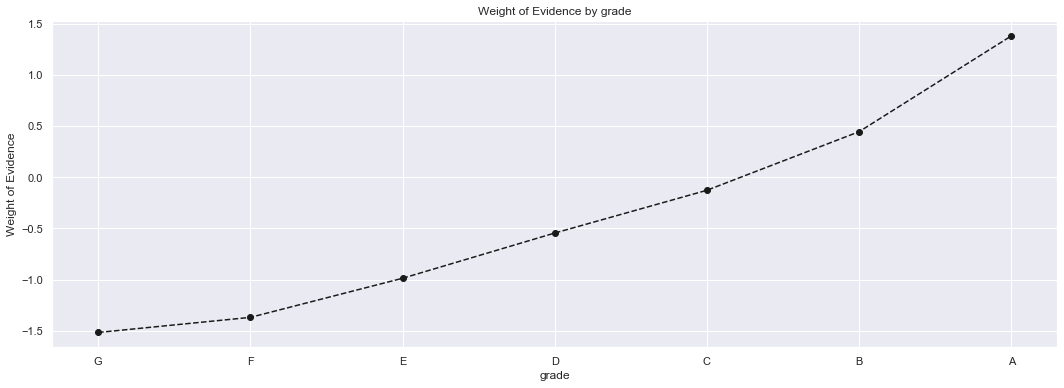

In [68]:
plot_by_woe(df_temp)

The greater the grade, the greater the weight of evidence. That means loans with greater external ratings are greater on avaerage

# Preprocessing Discrete Variables: Creating Dummy Variables, Stage 1

In [69]:
#home_ownership variable
#Executing our previous WOE function
df_temp1 = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp1

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,142,0.809859,0.000079,115.0,27.0,0.000073,0.000119,-0.490701,NaN,NaN,0.024684
1,RENT,715761,0.853880,0.395769,611174.0,104587.0,0.386512,0.460170,-0.174433,0.044021,0.316267,0.024684
2,NONE,43,0.860465,0.000024,37.0,6.0,0.000023,0.000026,-0.120637,0.006585,0.053796,0.024684
3,OWN,202560,0.874358,0.112002,177110.0,25450.0,0.112006,0.111977,0.000259,0.013893,0.120897,0.024684
4,MORTGAGE,889204,0.890740,0.491671,792050.0,97154.0,0.500900,0.427466,0.158531,0.016382,0.158272,0.024684
5,ANY,824,0.933252,0.000456,769.0,55.0,0.000486,0.000242,0.697962,0.042512,0.539431,0.024684


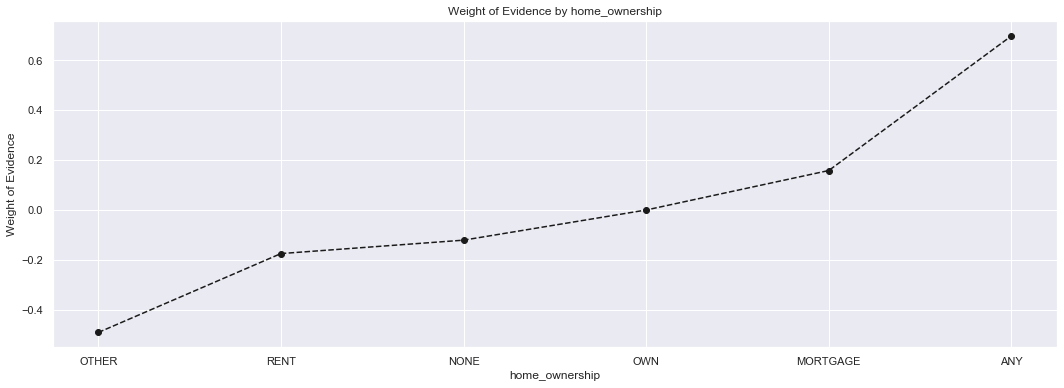

In [70]:
#Plotting the weight of evidence (woe) values by excuting the plot function we created previously.
plot_by_woe(df_temp1)


In [71]:
# There are many categories with home_ownership variable.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHER', 'ANY' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories for the 'home_onership': 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

# Preprocessing Discrete Variables, Stage 2

In [81]:
#Unique caterogies in the addr_state variable
df_inputs_prepr['addr_state'].unique()

array(['CA', 'PA', 'MO', 'OH', 'GA', 'NY', 'TX', 'AZ', 'AR', 'IN', 'UT',
       'IL', 'VA', 'KY', 'MA', 'NC', 'CO', 'RI', 'MT', 'AL', 'NE', 'OK',
       'FL', 'WA', 'KS', 'NJ', 'MN', 'OR', 'SC', 'TN', 'NV', 'MS', 'DE',
       'WI', 'MI', 'CT', 'MD', 'WV', 'LA', 'NM', 'SD', 'HI', 'ID', 'VT',
       'DC', 'ME', 'NH', 'WY', 'AK', 'ND', 'IA'], dtype=object)

In [82]:
#addr_state variable
# We calculate weight of evidence.
df_temp2 = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp2

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,IA,12,0.750000,0.000007,9.0,3.0,0.000006,0.000013,-0.841183,NaN,NaN,0.014338
1,AL,21792,0.847742,0.012050,18474.0,3318.0,0.011683,0.014599,-0.222794,0.097742,0.618390,0.014338
2,AR,13572,0.850796,0.007504,11547.0,2025.0,0.007302,0.008910,-0.198940,0.003053,0.023854,0.014338
3,MS,10065,0.851863,0.005565,8574.0,1491.0,0.005422,0.006560,-0.190508,0.001067,0.008431,0.014338
4,OK,16515,0.853224,0.009132,14091.0,2424.0,0.008911,0.010665,-0.179679,0.001361,0.010830,0.014338
5,LA,20517,0.853634,0.011345,17514.0,3003.0,0.011076,0.013213,-0.176407,0.000409,0.003272,0.014338
6,NV,26116,0.857941,0.014440,22406.0,3710.0,0.014170,0.016324,-0.141499,0.004308,0.034908,0.014338
7,NM,9623,0.860127,0.005321,8277.0,1346.0,0.005234,0.005922,-0.123452,0.002185,0.018046,0.014338
8,HI,8558,0.861767,0.004732,7375.0,1183.0,0.004664,0.005205,-0.109753,0.001640,0.013699,0.014338
9,NY,149066,0.862309,0.082424,128541.0,20525.0,0.081290,0.090308,-0.105192,0.000543,0.004562,0.014338


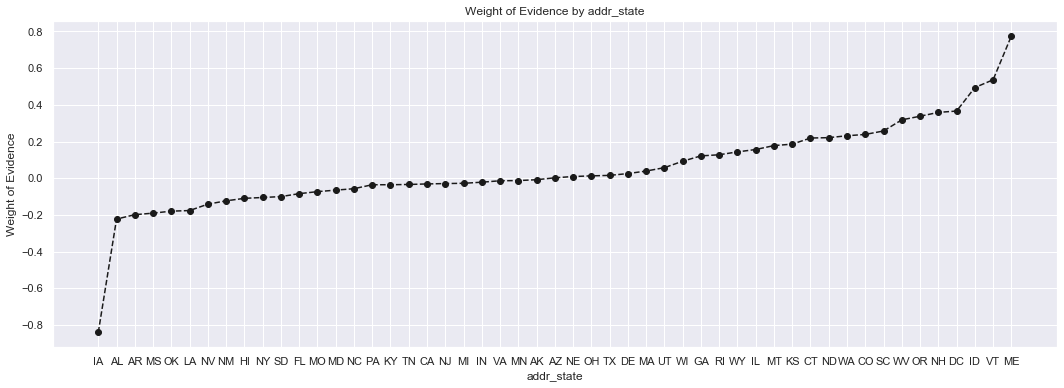

In [85]:
# We plot the weight of evidence values.
plot_by_woe(df_temp2)

In [86]:
#We want to get a normal curve
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

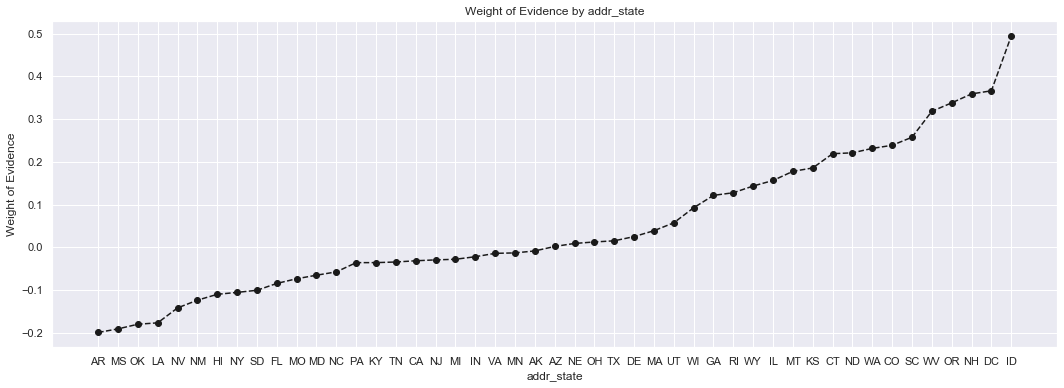

In [87]:
# We plot the weight of evidence values again for the 'addr_state' by removing the state IA and AL.
plot_by_woe(df_temp2.iloc[2: -2, : ])

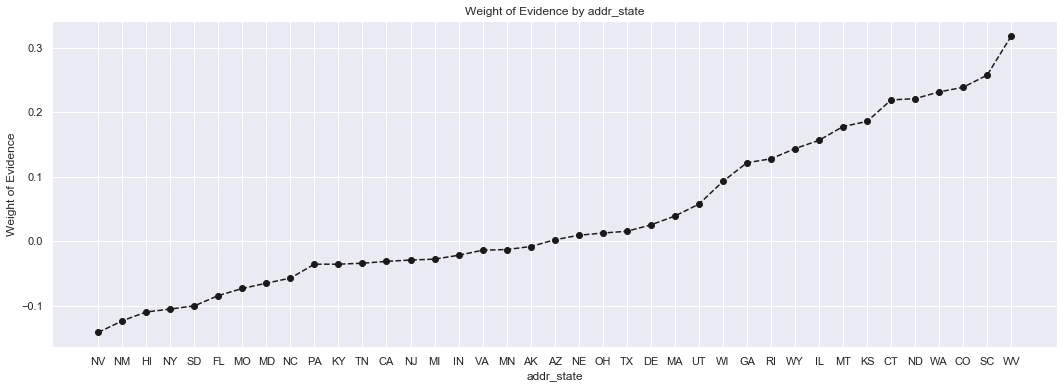

In [89]:
# We plot the weight of evidence values again by removing the upper states OR, NH, DC, ID, VT, ME.
plot_by_woe(df_temp2.iloc[6: -6, : ])

In [90]:
# Creating dummies for the 'addr_state' variable
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'ND_NE_IA_NV_FL_HI_AL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [91]:
# 'verification_status' variable'
# We calculate weight of evidence.

df_temp3 = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp3

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,503341,0.833606,0.278314,419588.0,83753.0,0.265351,0.368503,-0.328394,NaN,NaN,0.085899
1,Source Verified,708836,0.869610,0.391940,616411.0,92425.0,0.389824,0.406659,-0.042279,0.036004,0.286115,0.085899
2,Not Verified,596357,0.914311,0.329746,545256.0,51101.0,0.344825,0.224838,0.427656,0.044701,0.469935,0.085899


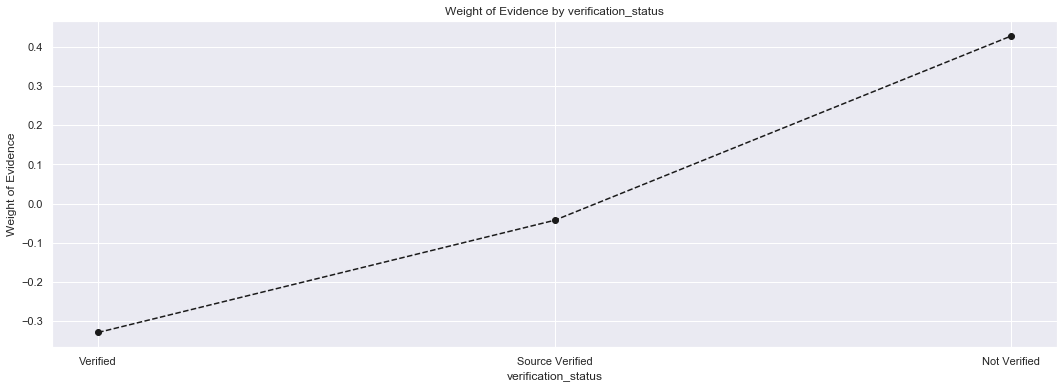

In [92]:
# We plot the weight of evidence values.
plot_by_woe(df_temp3)


In [93]:
# 'purpose' variable
# We calculate weight of evidence.

df_temp4 = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp4

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,344,0.787791,0.000190,271.0,73.0,0.000171,0.000321,-0.628136,NaN,NaN,0.023151
1,small_business,19765,0.801265,0.010929,15837.0,3928.0,0.010015,0.017283,-0.545577,0.013474,0.082559,0.023151
2,renewable_energy,1145,0.846288,0.000633,969.0,176.0,0.000613,0.000774,-0.234015,0.045023,0.311562,0.023151
3,moving,12419,0.848377,0.006867,10536.0,1883.0,0.006663,0.008285,-0.217864,0.002089,0.016151,0.023151
4,debt_consolidation,1022358,0.864036,0.565297,883354.0,139004.0,0.558641,0.611601,-0.090572,0.015658,0.127292,0.023151
5,medical,21975,0.867941,0.012151,19073.0,2902.0,0.012062,0.012768,-0.056922,0.003905,0.033650,0.023151
6,wedding,1886,0.872747,0.001043,1646.0,240.0,0.001041,0.001056,-0.014331,0.004806,0.042591,0.023151
7,other,111451,0.873568,0.061625,97360.0,14091.0,0.061571,0.061999,-0.006917,0.000821,0.007415,0.023151
8,house,11266,0.877508,0.006229,9886.0,1380.0,0.006252,0.006072,0.029240,0.003940,0.036157,0.023151
9,vacation,12391,0.879751,0.006851,10901.0,1490.0,0.006894,0.006556,0.050283,0.002244,0.021042,0.023151


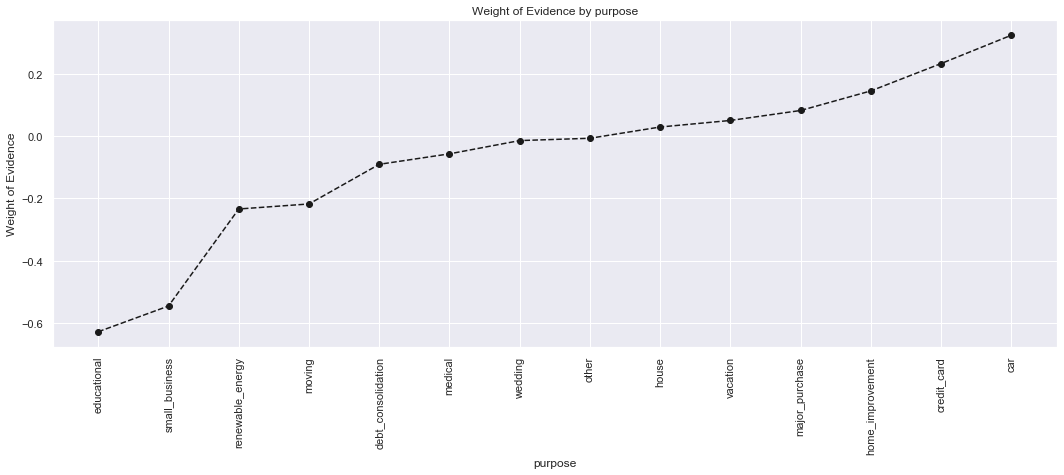

In [95]:
plot_by_woe(df_temp4, 90)
# We plot the weight of evidence values.

In [96]:
# We create dummy variables for the 'purpose' variable
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [97]:
# 'initial_list_status' variable
# We calculate weight of evidence.

df_temp5 = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp5

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,580462,0.842541,0.320957,489063.0,91399.0,0.309288,0.402145,-0.262539,NaN,NaN,0.037785
1,w,1228072,0.889355,0.679043,1092192.0,135880.0,0.690712,0.597855,0.144374,0.046814,0.406913,0.037785


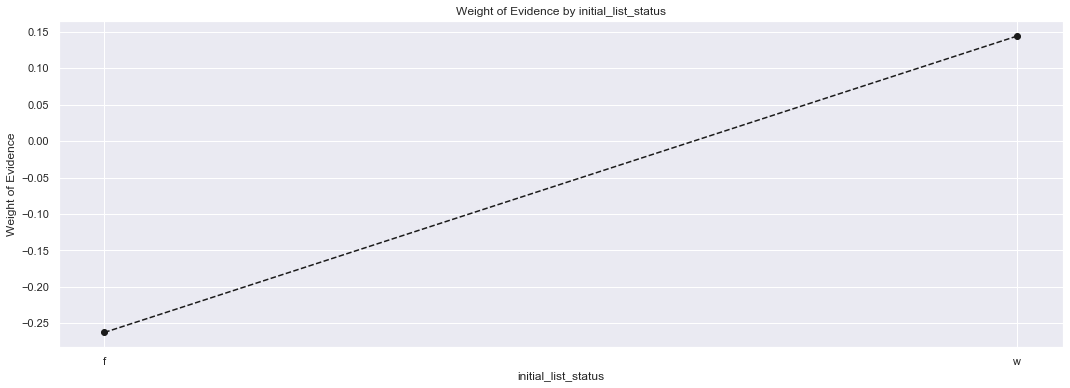

In [99]:
# We plot the weight of evidence values.
plot_by_woe(df_temp5)


# Preprocessing Continuous Variables

In [100]:
# WoE function for ordered discrete and continuous variables
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

# Preprocessing Continuous Variables: Creating Dummy Variables, Part 1

In [101]:
# term variable
# There are only two unique values, 36 and 60.
df_inputs_prepr['term_int'].unique()

array([36, 60], dtype=int64)

In [103]:
# We calculate weight of evidence.
df_temp6 = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp6

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,1288079,0.892962,0.712223,1150206.0,137873.0,0.727401,0.606624,0.181568,NaN,NaN,0.066225
1,60,520455,0.828216,0.287777,431049.0,89406.0,0.272599,0.393376,-0.366762,0.064747,0.548329,0.066225


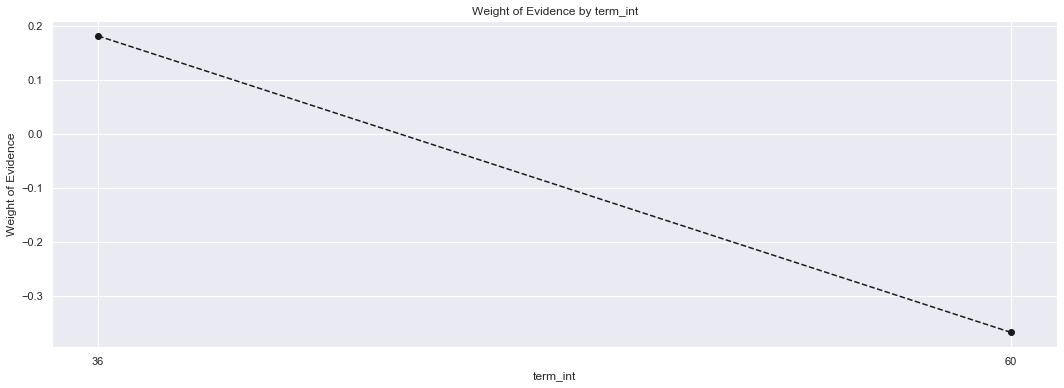

In [104]:
# We plot the weight of evidence values.
plot_by_woe(df_temp6)


It seems 60 months loans are much risky than 36 months loans

In [105]:
# We will keep both the 36 and 60 months category.
# However the '60' months will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [106]:
# emp_length_int variable
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  4.,  9.,  5.,  6.,  2.,  7.,  3.,  1.,  8.])

In [107]:
# We calculate weight of evidence.
df_temp7 = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp7

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,269712,0.863873,0.149133,232997.0,36715.0,0.147349,0.161542,-0.091956,NaN,NaN,0.004262
1,1.0,118648,0.869024,0.065605,103108.0,15540.0,0.065206,0.068374,-0.047436,0.005151,0.044519,0.004262
2,2.0,163041,0.874872,0.090151,142640.0,20401.0,0.090207,0.089762,0.004944,0.005848,0.052380,0.004262
3,3.0,144605,0.873794,0.079957,126355.0,18250.0,0.079908,0.080298,-0.004865,0.001078,0.009810,0.004262
4,4.0,109209,0.876604,0.060385,95733.0,13476.0,0.060542,0.059293,0.020857,0.002809,0.025722,0.004262
5,5.0,111790,0.874202,0.061812,97727.0,14063.0,0.061803,0.061875,-0.001165,0.002402,0.022022,0.004262
6,6.0,82062,0.874851,0.045375,71792.0,10270.0,0.045402,0.045187,0.004750,0.000649,0.005915,0.004262
7,7.0,74021,0.868470,0.040929,64285.0,9736.0,0.040654,0.042837,-0.052300,0.006381,0.057050,0.004262
8,8.0,73442,0.861864,0.040609,63297.0,10145.0,0.040030,0.044637,-0.108939,0.006606,0.056639,0.004262
9,9.0,63573,0.866421,0.035152,55081.0,8492.0,0.034834,0.037364,-0.070115,0.004557,0.038823,0.004262


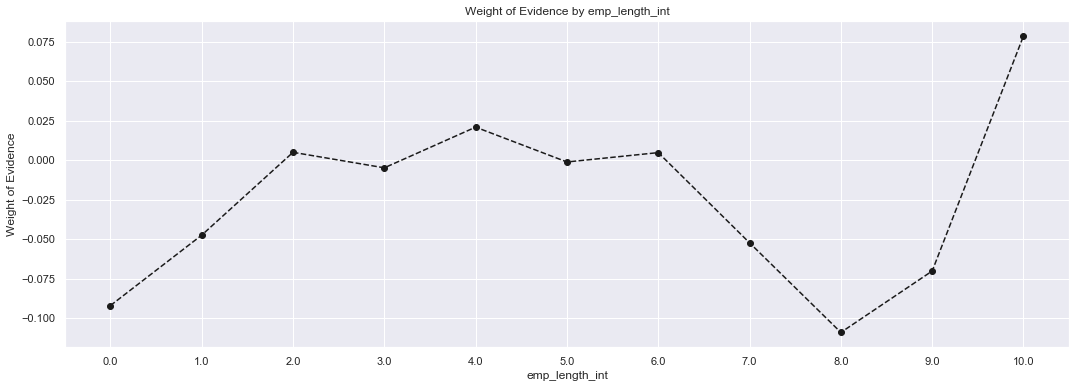

In [108]:
# We plot the weight of evidence values.
plot_by_woe(df_temp7)


In [109]:
# Employment length has several categories
# So we have to create the following new categories for emp_length_int: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

# Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [110]:
# Months since loan issue date (mths_since_issue_d) variable
df_inputs_prepr['mths_since_issue_d'].unique()

array([ -5., -11.,   7.,  14.,  22.,  17.,  74.,   5., -12.,  30.,   1.,
        43.,  -1.,  37.,  49.,  -8.,  -9.,  27.,  18.,  31.,   3.,  54.,
        -3.,  21.,  -4., -10.,   4.,  77.,  28.,  -6.,  34.,   0.,  13.,
        51.,  23.,  64.,  35.,  29.,  41.,   2.,  15.,  47.,  26.,   9.,
        40.,  46.,  -7.,  33.,  56.,  12.,  10.,  52.,  11.,  73.,  38.,
        24.,  16.,  45.,  79.,  59.,  20.,  58.,  39.,   6.,  48.,  19.,
         8.,  44.,  53.,  69.,  -2.,  61., 118.,  25.,  32.,  62.,  50.,
        66.,  42.,  84.,  72.,  67., 120.,  82.,  57.,  36.,  55.,  98.,
        70.,  63.,  81.,  65.,  95.,  60., 100.,  93.,  87.,  80.,  99.,
        92.,  97., 101.,  75.,  71.,  94.,  76., 113.,  90.,  86.,  68.,
        78.,  96., 110.,  83.,  85., 116.,  91., 108., 115.,  89., 119.,
       105., 107., 117., 102.,  88., 109., 122., 106., 112., 103., 104.,
       125., 126., 114., 121., 111., 123., 124.])

In [111]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [112]:
df_inputs_prepr['mths_since_issue_d_factor']

305053       (-6.48, -3.72]
50247      (-12.138, -9.24]
1630001        (4.56, 7.32]
927626        (12.84, 15.6]
758488       (21.12, 23.88]
                 ...       
732180       (18.36, 21.12]
110268     (-12.138, -9.24]
1692743      (48.72, 51.48]
2229084         (1.8, 4.56]
2219110        (-0.96, 1.8]
Name: mths_since_issue_d_factor, Length: 1808534, dtype: category
Categories (50, interval[float64]): [(-12.138, -9.24] < (-9.24, -6.48] < (-6.48, -3.72] < (-3.72, -0.96] ... (114.96, 117.72] < (117.72, 120.48] < (120.48, 123.24] < (123.24, 126.0]]

In [113]:
# mths_since_issue_d
# We calculate weight of evidence.
df_temp8 = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp8

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-12.138, -9.24]",102884,0.995655,0.056888,102437.0,447.0,0.064782,0.001967,3.494649,NaN,NaN,0.540132
1,"(-9.24, -6.48]",102605,0.983724,0.056734,100935.0,1670.0,0.063832,0.007348,2.161857,0.011931,1.332792,0.540132
2,"(-6.48, -3.72]",104563,0.961726,0.057816,100561.0,4002.0,0.063596,0.017608,1.284174,0.021998,0.877683,0.540132
3,"(-3.72, -0.96]",86368,0.945686,0.047756,81677.0,4691.0,0.051653,0.020640,0.917331,0.016041,0.366844,0.540132
4,"(-0.96, 1.8]",64324,0.928394,0.035567,59718.0,4606.0,0.037766,0.020266,0.622478,0.017292,0.294853,0.540132
5,"(1.8, 4.56]",97239,0.908185,0.053767,88311.0,8928.0,0.055849,0.039282,0.351876,0.020209,0.270601,0.540132
6,"(4.56, 7.32]",92057,0.890839,0.050901,82008.0,10049.0,0.051863,0.044214,0.159548,0.017346,0.192329,0.540132
7,"(7.32, 10.08]",75549,0.881613,0.041774,66605.0,8944.0,0.042122,0.039353,0.068001,0.009226,0.091547,0.540132
8,"(10.08, 12.84]",54361,0.863266,0.030058,46928.0,7433.0,0.029678,0.032704,-0.097111,0.018347,0.165112,0.540132
9,"(12.84, 15.6]",76286,0.854626,0.042181,65196.0,11090.0,0.041231,0.048795,-0.168441,0.008640,0.071331,0.540132


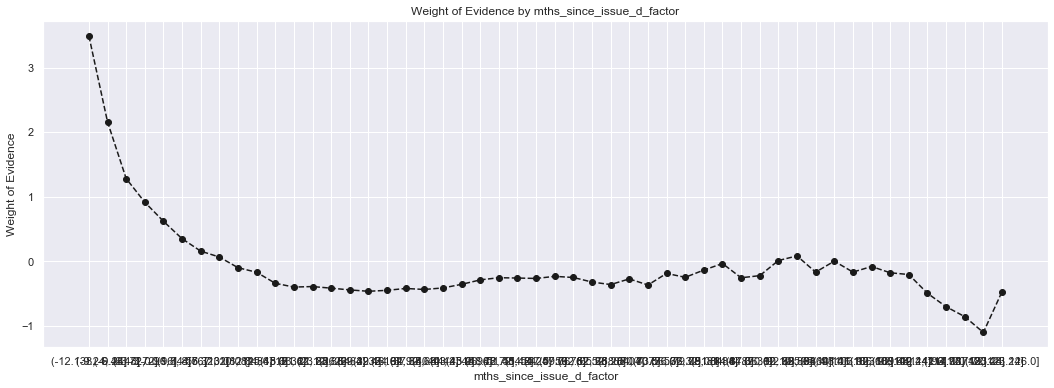

In [114]:
# We plot the weight of evidence values.
plot_by_woe(df_temp8)

We have to rotate the labels because we cannot read them otherwise.


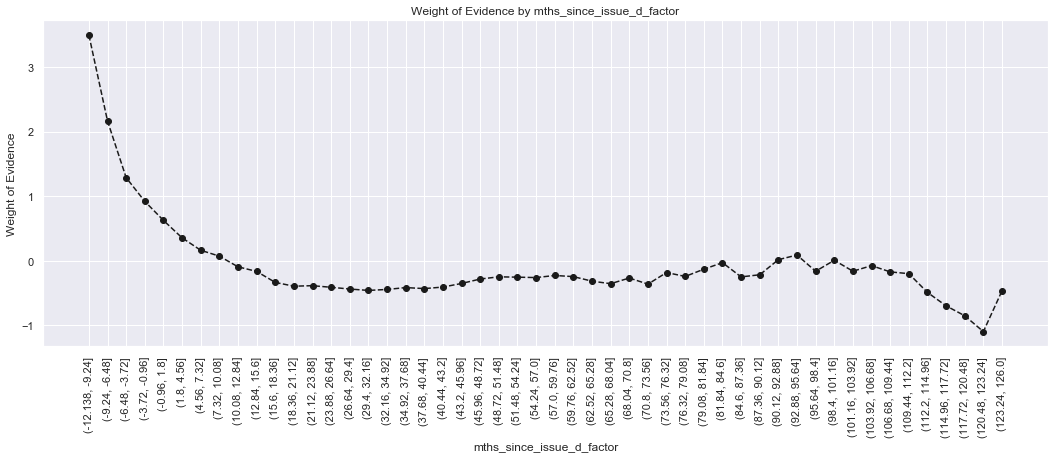

In [115]:
# We plot the weight of evidence values, rotating the labels 90 degrees.
plot_by_woe(df_temp8, 90)


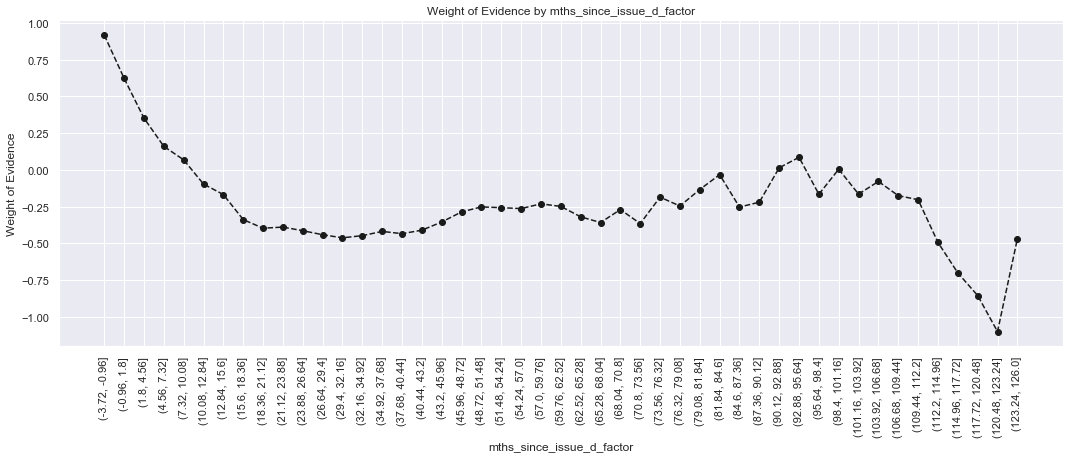

In [116]:
# We plot the weight of evidence values.
plot_by_woe(df_temp8.iloc[3: , : ], 90)

In [117]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [118]:
# int_rate variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [119]:
# We calculate weight of evidence.
df_temp9 = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp9

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.284, 5.824]",45407,0.979519,0.025107,44477.0,930.0,0.028128,0.004092,1.927747,NaN,NaN,0.472031
1,"(5.824, 6.337]",39268,0.982785,0.021713,38592.0,676.0,0.024406,0.002974,2.104811,0.003266,0.177064,0.472031
2,"(6.337, 6.851]",41392,0.975478,0.022887,40377.0,1015.0,0.025535,0.004466,1.743576,0.007307,0.361236,0.472031
3,"(6.851, 7.364]",76394,0.965442,0.042241,73754.0,2640.0,0.046643,0.011616,1.390161,0.010036,0.353415,0.472031
4,"(7.364, 7.878]",43531,0.962096,0.024070,41881.0,1650.0,0.026486,0.007260,1.294261,0.003346,0.095899,0.472031
5,"(7.878, 8.392]",110343,0.936670,0.061012,103355.0,6988.0,0.065363,0.030746,0.754179,0.025426,0.540082,0.472031
6,"(8.392, 8.905]",29804,0.951315,0.016480,28353.0,1451.0,0.017931,0.006384,1.032684,0.014645,0.278505,0.472031
7,"(8.905, 9.419]",37307,0.900582,0.020628,33598.0,3709.0,0.021248,0.016319,0.263908,0.050734,0.768776,0.472031
8,"(9.419, 9.932]",79775,0.938439,0.044110,74864.0,4911.0,0.047345,0.021608,0.784400,0.037858,0.520491,0.472031
9,"(9.932, 10.446]",63096,0.933736,0.034888,58915.0,4181.0,0.037258,0.018396,0.705749,0.004703,0.078650,0.472031


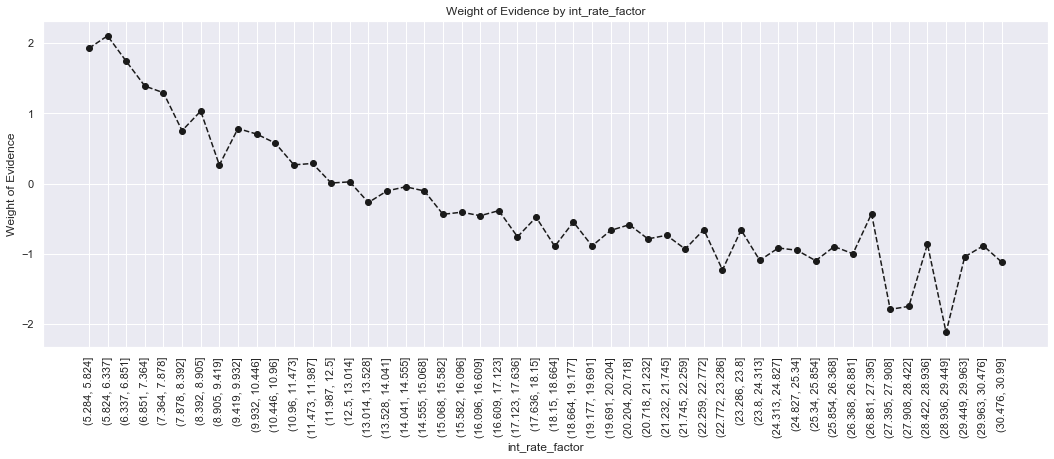

In [121]:
# We plot the weight of evidence values.
plot_by_woe(df_temp9, 90)


In [122]:
# We create the following categories:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [123]:
# funded_amnt variable
df_inputs_prepr['funded_amnt'].unique()

array([14600, 10000, 20000, ..., 35675,   900,   725], dtype=int64)

In [124]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)


In [126]:
# We calculate weight of evidence.
df_temp10 = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp10

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(460.5, 1290.0]",11369,0.920134,0.006286,10461.0,908.0,0.006616,0.003995,0.504369,NaN,NaN,0.041534
1,"(1290.0, 2080.0]",25449,0.909702,0.014072,23151.0,2298.0,0.014641,0.010111,0.370203,0.010432,0.134166,0.041534
2,"(2080.0, 2870.0]",22367,0.897349,0.012367,20071.0,2296.0,0.012693,0.010102,0.228312,0.012353,0.141891,0.041534
3,"(2870.0, 3660.0]",50818,0.899681,0.028099,45720.0,5098.0,0.028914,0.022431,0.253892,0.002332,0.025580,0.041534
4,"(3660.0, 4450.0]",39876,0.893369,0.022049,35624.0,4252.0,0.022529,0.018708,0.185834,0.006312,0.068057,0.041534
5,"(4450.0, 5240.0]",93838,0.892560,0.051886,83756.0,10082.0,0.052968,0.044360,0.177360,0.000810,0.008474,0.041534
6,"(5240.0, 6030.0]",84340,0.895684,0.046634,75542.0,8798.0,0.047773,0.038710,0.210369,0.003125,0.033008,0.041534
7,"(6030.0, 6820.0]",27430,0.879803,0.015167,24133.0,3297.0,0.015262,0.014506,0.050771,0.015881,0.159597,0.041534
8,"(6820.0, 7610.0]",63276,0.885960,0.034987,56060.0,7216.0,0.035453,0.031750,0.110326,0.006157,0.059555,0.041534
9,"(7610.0, 8400.0]",81667,0.881409,0.045156,71982.0,9685.0,0.045522,0.042613,0.066042,0.004551,0.044284,0.041534


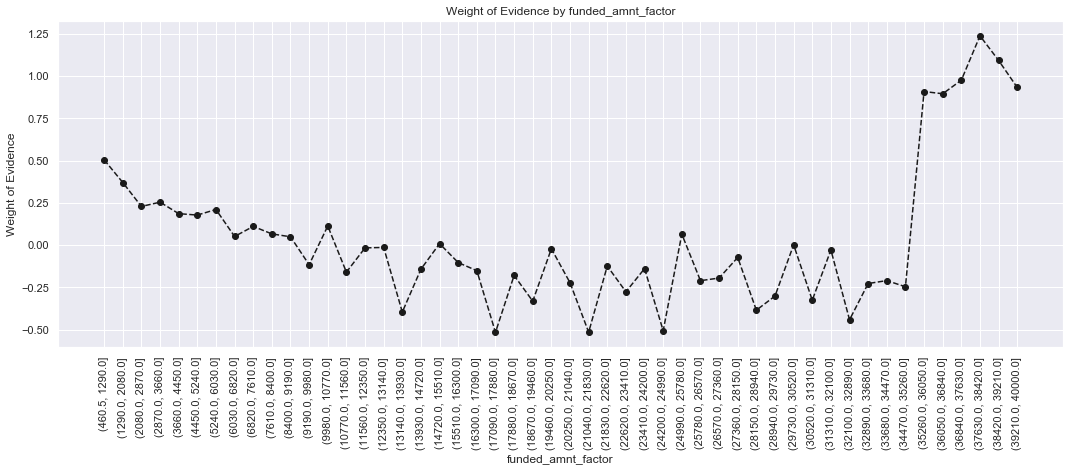

In [127]:
# We plot the weight of evidence values.
plot_by_woe(df_temp10, 90)

In [128]:
# mths_since_earliest_cr_line variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

In [129]:
# We calculate weight of evidence.
df_temp11 = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp11

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.017, 20.34]",21,0.904762,1.161161e-05,19.0,2.0,1.201577e-05,0.000009,0.311496,NaN,NaN,inf
1,"(20.34, 40.68]",8391,0.962102,4.639669e-03,8073.0,318.0,5.105438e-03,0.001399,1.294433,0.057340,0.982937,inf
2,"(40.68, 61.02]",29026,0.917970,1.604946e-02,26645.0,2381.0,1.685054e-02,0.010476,0.475285,0.044132,0.819148,inf
3,"(61.02, 81.36]",46940,0.886877,2.595472e-02,41630.0,5310.0,2.632719e-02,0.023363,0.119433,0.031093,0.355852,inf
4,"(81.36, 101.7]",53631,0.880890,2.965441e-02,47243.0,6388.0,2.987690e-02,0.028106,0.061087,0.005987,0.058346,inf
5,"(101.7, 122.04]",79711,0.878085,4.407492e-02,69993.0,9718.0,4.426421e-02,0.042758,0.034620,0.002805,0.026468,inf
6,"(122.04, 142.38]",153998,0.879011,8.515074e-02,135366.0,18632.0,8.560669e-02,0.081979,0.043306,0.000927,0.008686,inf
7,"(142.38, 162.72]",190558,0.870717,1.053660e-01,165922.0,24636.0,1.049306e-01,0.108395,-0.032487,0.008295,0.075793,inf
8,"(162.72, 183.06]",195847,0.865477,1.082905e-01,169501.0,26346.0,1.071940e-01,0.115919,-0.078253,0.005240,0.045767,inf
9,"(183.06, 203.4]",177918,0.864061,9.837692e-02,153732.0,24186.0,9.722151e-02,0.106415,-0.090359,0.001416,0.012105,inf


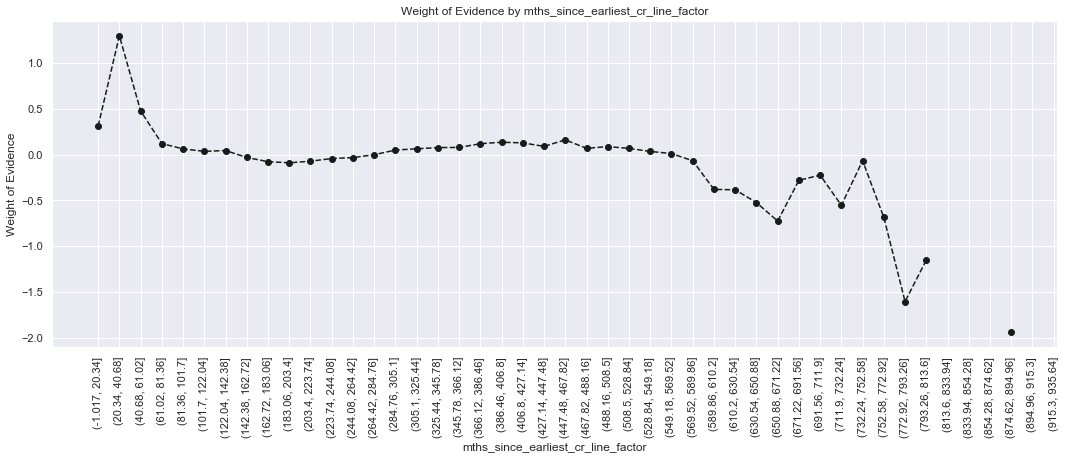

In [130]:
# We plot the weight of evidence values.
plot_by_woe(df_temp11, 90)

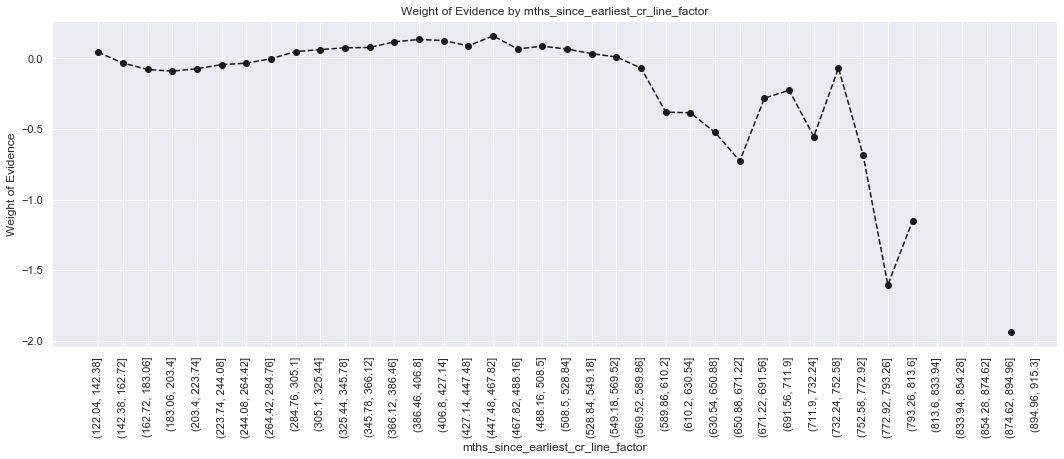

In [131]:
# We plot the weight of evidence values
plot_by_woe(df_temp11.iloc[6: , : ], 90)

In [132]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [133]:
# delinq_2yrs variable
# We calculate weight of evidence
df_temp12 = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp12

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1471443,0.877602,8.136109e-01,1291342.0,180101.0,8.166564e-01,0.792423,0.030124,NaN,NaN,inf
1,1.0,224968,0.864514,1.243925e-01,194488.0,30480.0,1.229960e-01,0.134108,-0.086496,0.013088,0.116620,inf
2,2.0,65018,0.854056,3.595067e-02,55529.0,9489.0,3.511704e-02,0.041750,-0.173024,0.010458,0.086528,inf
3,3.0,23720,0.848820,1.311560e-02,20134.0,3586.0,1.273292e-02,0.015778,-0.214423,0.005236,0.041400,inf
4,4.0,10476,0.847079,5.792537e-03,8874.0,1602.0,5.611998e-03,0.007049,-0.227923,0.001741,0.013500,inf
5,5.0,5261,0.838814,2.908986e-03,4413.0,848.0,2.790821e-03,0.003731,-0.290366,0.008265,0.062443,inf
6,6.0,2938,0.852621,1.624520e-03,2505.0,433.0,1.584185e-03,0.001905,-0.184489,0.013807,0.105877,inf
7,7.0,1657,0.839469,9.162117e-04,1391.0,266.0,8.796810e-04,0.001170,-0.285514,0.013152,0.101024,inf
8,8.0,985,0.847716,5.446400e-04,835.0,150.0,5.280616e-04,0.000660,-0.222999,0.008247,0.062515,inf
9,9.0,647,0.833076,3.577483e-04,539.0,108.0,3.408685e-04,0.000475,-0.332211,0.014640,0.109212,inf


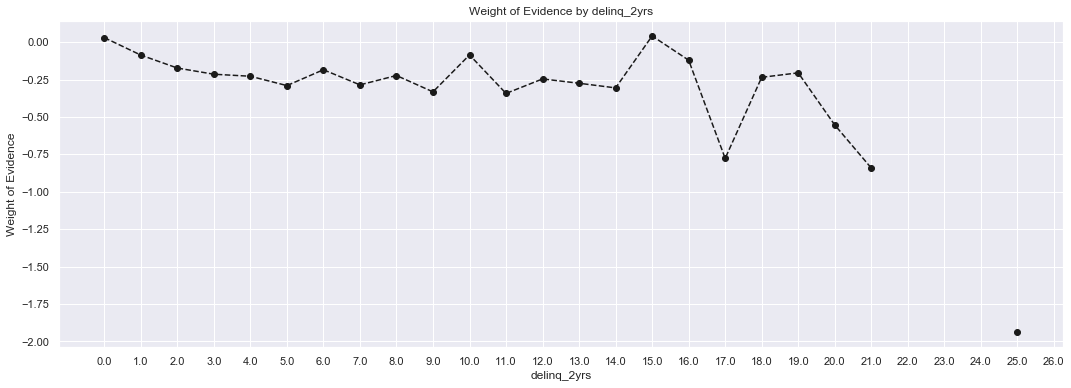

In [134]:
# We plot the weight of evidence values
plot_by_woe(df_temp12)


In [135]:
# We create the following Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [136]:
# inq_last_6mths variable
# We calculate weight of evidence.
df_temp13 = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp13

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1105491,0.893913,6.112636e-01,988213.0,117278.0,6.249549e-01,0.516009,0.191555,NaN,NaN,inf
1,1.0,467442,0.858017,2.584646e-01,401073.0,66369.0,2.536422e-01,0.292016,-0.140882,0.035897,0.332438,inf
2,2.0,160218,0.828827,8.858999e-02,132793.0,27425.0,8.397950e-02,0.120667,-0.362459,0.029190,0.221577,inf
3,3.0,55170,0.795668,3.050537e-02,43897.0,11273.0,2.776086e-02,0.049600,-0.580360,0.033159,0.217901,inf
4,4.0,13879,0.762735,7.674171e-03,10586.0,3293.0,6.694682e-03,0.014489,-0.772062,0.032933,0.191702,inf
5,5.0,4978,0.746083,2.752506e-03,3714.0,1264.0,2.348767e-03,0.005561,-0.861968,0.016652,0.089905,inf
6,6.0,993,0.746224,5.490635e-04,741.0,252.0,4.686151e-04,0.001109,-0.861224,0.000141,0.000743,inf
7,7.0,149,0.671141,8.238717e-05,100.0,49.0,6.324091e-05,0.000216,-1.226446,0.075083,0.365222,inf
8,8.0,98,0.632653,5.418754e-05,62.0,36.0,3.920936e-05,0.000158,-1.396180,0.038488,0.169734,inf
9,9.0,42,0.642857,2.322323e-05,27.0,15.0,1.707504e-05,0.000066,-1.352009,0.010204,0.044171,inf


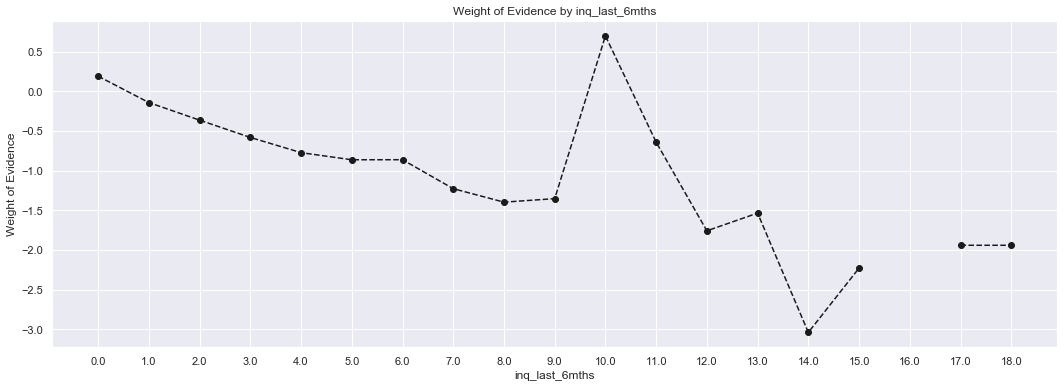

In [137]:
# We plot the weight of evidence values
plot_by_woe(df_temp13)

In [138]:
# We create the following Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [139]:
# open_acc variable
# We calculate weight of evidence.
df_temp14 = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp14

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,67,0.895522,3.704658e-05,60.0,7.0,3.794454e-05,0.000031,0.208639,NaN,NaN,inf
1,1.0,1303,0.901765,7.204730e-04,1175.0,128.0,7.430807e-04,0.000563,0.277197,0.006243,0.068559,inf
2,2.0,8758,0.896095,4.842596e-03,7848.0,910.0,4.963146e-03,0.004004,0.214774,0.005670,0.062424,inf
3,3.0,26099,0.897927,1.443103e-02,23435.0,2664.0,1.482051e-02,0.011721,0.234606,0.001832,0.019832,inf
4,4.0,54293,0.891091,3.002045e-02,48380.0,5913.0,3.059595e-02,0.026016,0.162137,0.006836,0.072469,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
82,88.0,1,1.000000,5.529340e-07,1.0,0.0,6.324091e-07,0.000000,inf,0.000000,NaN,inf
83,91.0,1,1.000000,5.529340e-07,1.0,0.0,6.324091e-07,0.000000,inf,0.000000,NaN,inf
84,93.0,1,1.000000,5.529340e-07,1.0,0.0,6.324091e-07,0.000000,inf,0.000000,NaN,inf
85,97.0,1,1.000000,5.529340e-07,1.0,0.0,6.324091e-07,0.000000,inf,0.000000,NaN,inf


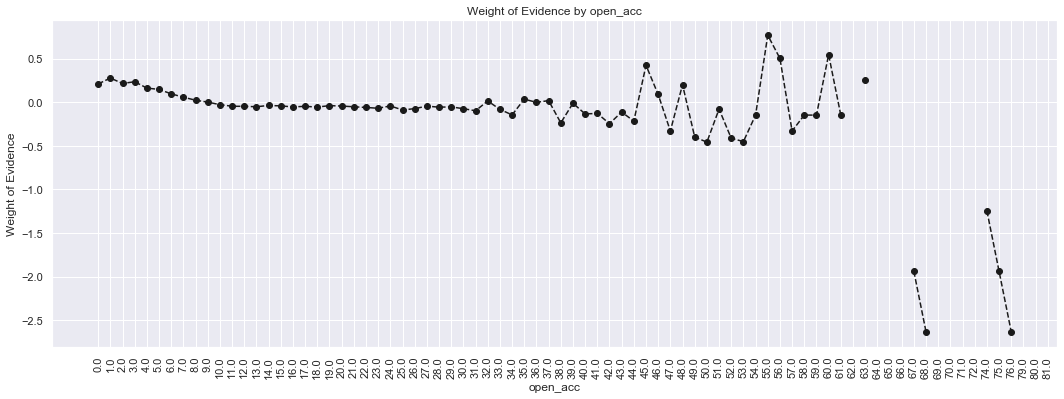

In [140]:
# We plot the weight of evidence values
plot_by_woe(df_temp14, 90)

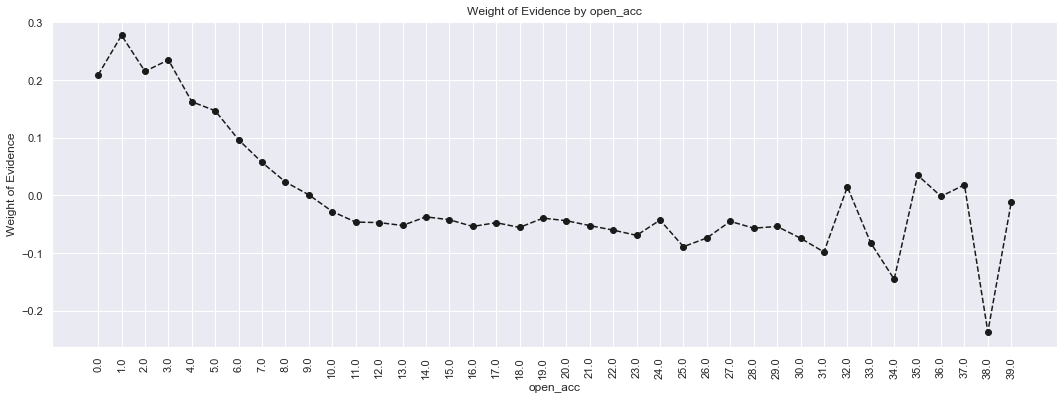

In [141]:
# We plot the weight of evidence values
plot_by_woe(df_temp14.iloc[ : 40, :], 90)


In [142]:
# We create the following Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [143]:
# pub_rec variable
# We calculate weight of evidence
df_temp15 = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp15

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1522737,0.879409,8.419731e-01,1339109.0,183628.0,8.468647e-01,0.807941,0.047052,NaN,NaN,inf
1,1.0,243927,0.850914,1.348755e-01,207561.0,36366.0,1.312635e-01,0.160006,-0.198005,0.028495,0.245057,inf
2,2.0,27258,0.824162,1.507188e-02,22465.0,4793.0,1.420707e-02,0.021089,-0.394994,0.026753,0.196989,inf
3,3.0,8404,0.827939,4.646858e-03,6958.0,1446.0,4.400302e-03,0.006362,-0.368705,0.003777,0.026289,inf
4,4.0,3123,0.825488,1.726813e-03,2578.0,545.0,1.630351e-03,0.002398,-0.385812,0.002451,0.017108,inf
5,5.0,1465,0.836860,8.100484e-04,1226.0,239.0,7.753335e-04,0.001052,-0.304747,0.011372,0.081065,inf
6,6.0,753,0.826029,4.163593e-04,622.0,131.0,3.933584e-04,0.000576,-0.382053,0.010831,0.077306,inf
7,7.0,346,0.858382,1.913152e-04,297.0,49.0,1.878255e-04,0.000216,-0.137884,0.032352,0.244169,inf
8,8.0,179,0.860335,9.897519e-05,154.0,25.0,9.739100e-05,0.000110,-0.121719,0.001954,0.016165,inf
9,9.0,111,0.873874,6.137568e-05,97.0,14.0,6.134368e-05,0.000062,-0.004142,0.013539,0.117577,inf


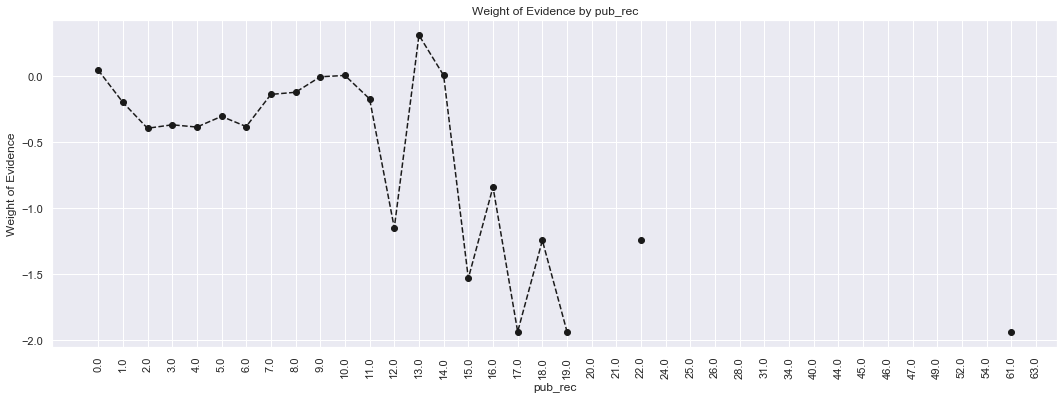

In [144]:
# We plot the weight of evidence values.
plot_by_woe(df_temp15, 90)

In [145]:
# We create the following Categories: '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [146]:
# total_acc variable
df_inputs_prepr['total_acc'].unique()

array([ 12.,  18.,  26.,  20.,  14.,  30.,   8.,  23.,  40.,  11.,   9.,
        21.,  17.,  25.,  28.,  33.,  24.,  13.,  16.,  78.,  64.,  38.,
        29.,  34.,  45.,  19.,  49.,  15.,  27.,  22.,  31.,  39.,  35.,
        44.,   6.,  36.,  57.,   7.,  61.,  10.,  42.,  47.,  51.,  37.,
        67.,   4.,  63.,   5.,  55.,  87.,  41.,  48.,  46.,  32.,  43.,
        52.,  50.,  58.,  65.,  54.,  56.,   2., 110.,  60.,  53.,  80.,
        77.,  72.,  59.,  71.,   3.,  62., 102.,  90.,  75.,  66.,  76.,
        93.,  95.,  74., 100.,  70.,  69.,  73.,  68.,  86.,  94.,  92.,
        82.,  83.,  81.,  85.,  79.,  88.,   0.,  84.,  96.,  89.,   1.,
       111.,  91., 112., 105.,  99., 113., 106., 101., 109., 103., 108.,
       118.,  97.,  98., 104., 140., 119., 115., 116., 136., 122., 137.,
       107., 133., 114., 117., 141., 127., 146., 129., 144., 151., 176.,
       123., 121., 124., 162., 120., 156., 135., 126., 128., 138., 153.,
       173., 148., 165., 150., 125., 160.])

In [147]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

In [148]:
# We calculate weight of evidence
df_temp16 = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp16

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.176, 3.52]",4507,0.906812,2.492074e-03,4087.0,420.0,2.584656e-03,0.001848,0.335516,NaN,NaN,inf
1,"(3.52, 7.04]",65972,0.887604,3.647816e-02,58557.0,7415.0,3.703198e-02,0.032625,0.126700,0.019208,0.208816,inf
2,"(7.04, 10.56]",111356,0.882108,6.157252e-02,98228.0,13128.0,6.212028e-02,0.057762,0.072748,0.005496,0.053952,inf
3,"(10.56, 14.08]",215860,0.877740,1.193563e-01,189469.0,26391.0,1.198219e-01,0.116117,0.031407,0.004368,0.041342,inf
4,"(14.08, 17.6]",190482,0.875500,1.053240e-01,166767.0,23715.0,1.054650e-01,0.104343,0.010694,0.002240,0.020713,inf
5,"(17.6, 21.12]",261853,0.874949,1.447874e-01,229108.0,32745.0,1.448900e-01,0.144074,0.005647,0.000551,0.005047,inf
6,"(21.12, 24.64]",185683,0.873812,1.026705e-01,162252.0,23431.0,1.026096e-01,0.103094,-0.004705,0.001137,0.010352,inf
7,"(24.64, 28.16]",214624,0.873476,1.186729e-01,187469.0,27155.0,1.185571e-01,0.119479,-0.007743,0.000335,0.003038,inf
8,"(28.16, 31.68]",131815,0.872405,7.288500e-02,114996.0,16819.0,7.272451e-02,0.074002,-0.017408,0.001072,0.009664,inf
9,"(31.68, 35.2]",136760,0.871410,7.561926e-02,119174.0,17586.0,7.536672e-02,0.077376,-0.026314,0.000995,0.008907,inf


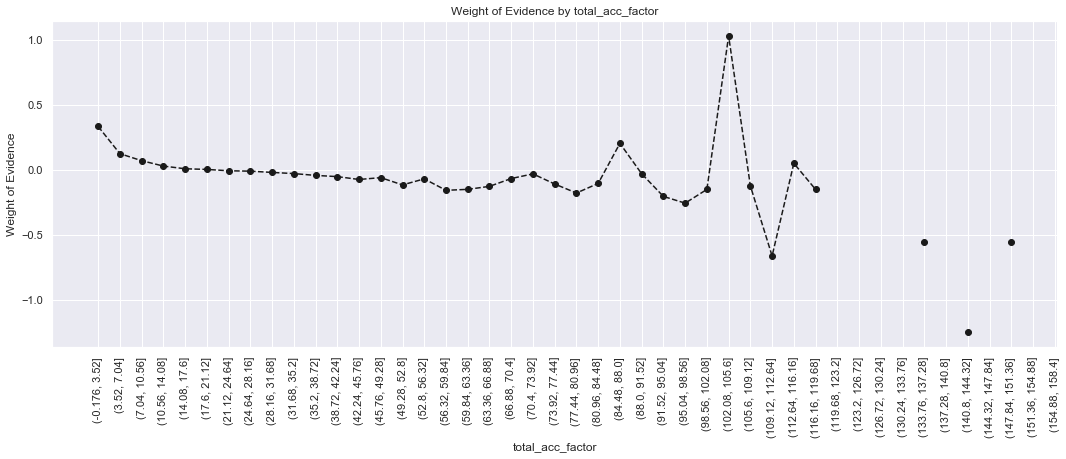

In [150]:
# We plot the weight of evidence values
plot_by_woe(df_temp16, 90)

In [151]:
# We create the following Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [152]:
# acc_now_delinq variable
# We calculate weight of evidence.
df_temp17 = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp17

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,1801431,0.874509,9.960725e-01,1575367.0,226064.0,9.962764e-01,0.994654,0.001630,NaN,NaN,inf
1,1.0,6712,0.829857,3.711293e-03,5570.0,1142.0,3.522519e-03,0.005025,-0.355182,0.044652,0.356811,inf
2,2.0,336,0.827381,1.857858e-04,278.0,58.0,1.758097e-04,0.000255,-0.372618,0.002476,0.017436,inf
3,3.0,40,0.725000,2.211736e-05,29.0,11.0,1.833986e-05,0.000048,-0.970395,0.102381,0.597778,inf
4,4.0,10,0.800000,5.529340e-06,8.0,2.0,5.059273e-06,0.000009,-0.553501,0.075000,0.416894,inf
5,5.0,3,0.666667,1.658802e-06,2.0,1.0,1.264818e-06,0.000004,-1.246649,0.133333,0.693147,inf
6,6.0,1,0.000000,5.529340e-07,0.0,1.0,0.000000e+00,0.000004,-inf,0.666667,inf,inf
7,14.0,1,1.000000,5.529340e-07,1.0,0.0,6.324091e-07,0.000000,inf,1.000000,inf,inf


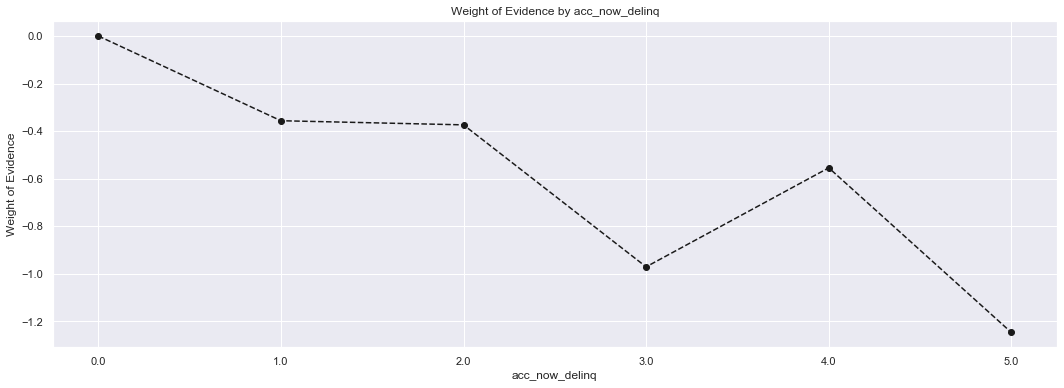

In [153]:
# We plot the weight of evidence values
plot_by_woe(df_temp17)

In [154]:
# We create the following Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [156]:
# total_rev_hi_lim variable
df_inputs_prepr['total_rev_hi_lim'].unique()

array([ 5800., 16200., 49300., ..., 12582., 38926., 26905.])

In [157]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)

In [158]:
# We calculate weight of evidence.
df_temp18 = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp18

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",68506,0.849283,0.037879,58181.0,10325.0,0.036794,0.045429,-0.210805,NaN,NaN,inf
1,"(5000.0, 9999.999]",188739,0.851615,0.104360,160733.0,28006.0,0.101649,0.123223,-0.192470,0.002332,0.018335,inf
2,"(9999.999, 14999.998]",233171,0.853940,0.128928,199114.0,34057.0,0.125921,0.149847,-0.173954,0.002325,0.018516,inf
3,"(14999.998, 19999.998]",225149,0.856948,0.124493,192941.0,32208.0,0.122018,0.141711,-0.149626,0.003008,0.024328,inf
4,"(19999.998, 24999.997]",195168,0.862964,0.107915,168423.0,26745.0,0.106512,0.117675,-0.099665,0.006016,0.049962,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


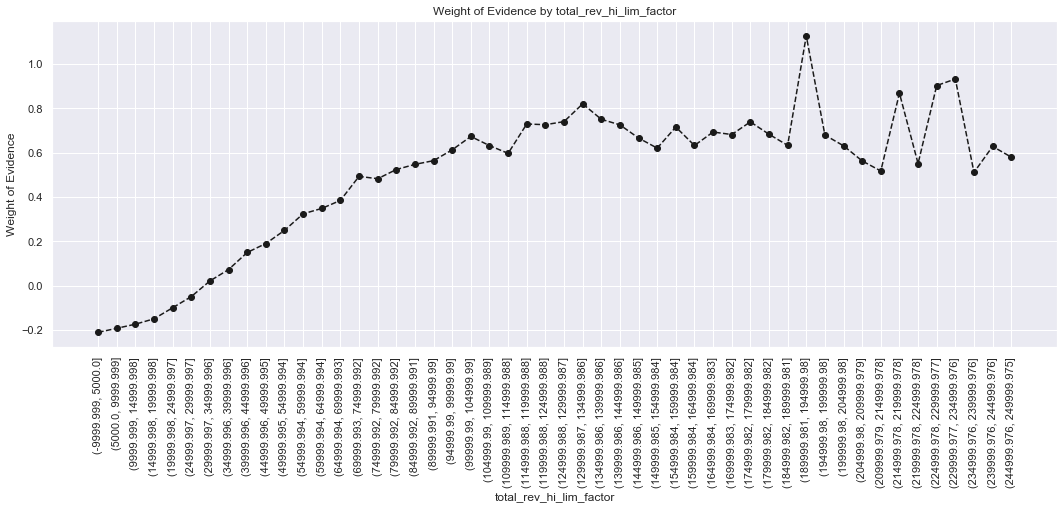

In [159]:
# We plot the weight of evidence values.
plot_by_woe(df_temp18.iloc[: 50, : ], 90)

In [160]:
# We create the following Categories:'<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [161]:
# installment variable
df_inputs_prepr['installment'].unique()

array([ 556.45,  230.41,  671.38, ..., 1211.55,  915.63,  834.52])

In [162]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)

In [163]:
# We calculate weight of evidence.
df_temp19 = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp19

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(3.215, 39.228]",8514,0.920249,4.707680e-03,7835.0,679.0,4.954925e-03,0.002988,0.505939,NaN,NaN,inf
1,"(39.228, 73.526]",29197,0.912388,1.614401e-02,26639.0,2558.0,1.684675e-02,0.011255,0.403355,0.007861,0.102584,inf
2,"(73.526, 107.824]",48541,0.904823,2.683997e-02,43921.0,4620.0,2.777604e-02,0.020327,0.312202,0.007566,0.091153,inf
3,"(107.824, 142.122]",56043,0.900130,3.098808e-02,50446.0,5597.0,3.190251e-02,0.024626,0.258877,0.004692,0.053325,inf
4,"(142.122, 176.42]",96018,0.896394,5.309162e-02,86070.0,9948.0,5.443145e-02,0.043770,0.217994,0.003736,0.040883,inf
5,"(176.42, 210.718]",94512,0.896553,5.225890e-02,84735.0,9777.0,5.358718e-02,0.043018,0.219700,0.000158,0.001707,inf
6,"(210.718, 245.016]",95293,0.891923,5.269074e-02,84994.0,10299.0,5.375098e-02,0.045314,0.170738,0.004630,0.048962,inf
7,"(245.016, 279.314]",123283,0.875798,6.816737e-02,107971.0,15312.0,6.828184e-02,0.067371,0.013430,0.016125,0.157308,inf
8,"(279.314, 313.612]",116998,0.879083,6.469218e-02,102851.0,14147.0,6.504390e-02,0.062245,0.043983,0.003285,0.030553,inf
9,"(313.612, 347.91]",142388,0.872721,7.873117e-02,124265.0,18123.0,7.858631e-02,0.079739,-0.014561,0.006362,0.058544,inf


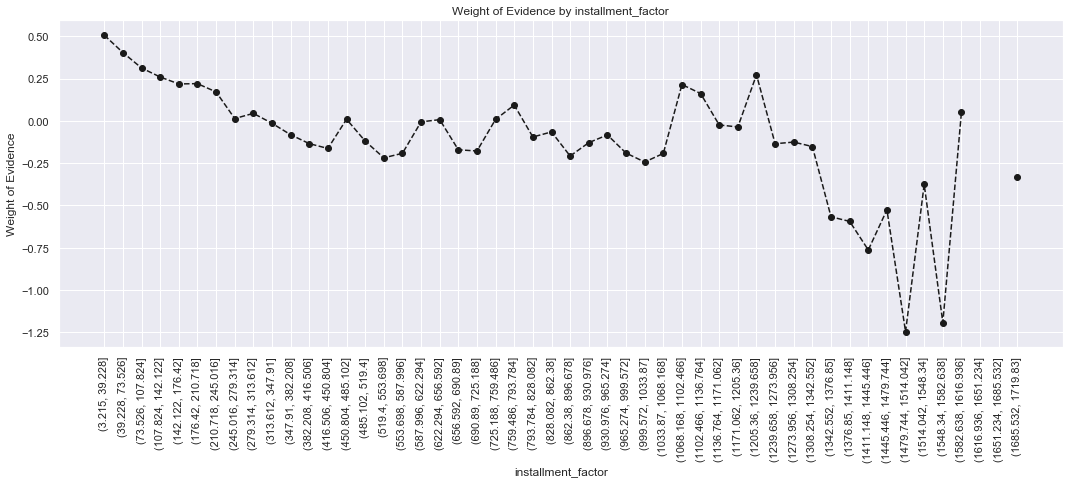

In [165]:
# We plot the weight of evidence values.
plot_by_woe(df_temp19, 90)

# Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [166]:
# annual_inc variable
df_inputs_prepr['annual_inc'].unique()

array([ 16000.,  26000., 120000., ...,  77582., 104919., 180360.])

In [167]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp20

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-110000.0, 2200000.0]",1808379,0.874327,9.999143e-01,1581115.0,227264.0,9.999115e-01,0.999934,-0.000023,NaN,NaN,inf
1,"(2200000.0, 4400000.0]",61,0.901639,3.372898e-05,55.0,6.0,3.478250e-05,0.000026,0.275778,0.027312,0.275800,inf
2,"(4400000.0, 6600000.0]",49,0.897959,2.709377e-05,44.0,5.0,2.782600e-05,0.000022,0.234956,0.003680,0.040822,inf
3,"(6600000.0, 8800000.0]",31,0.967742,1.714096e-05,30.0,1.0,1.897227e-05,0.000004,1.461402,0.069783,1.226446,inf
4,"(8800000.0, 11000000.0]",12,0.750000,6.635208e-06,9.0,3.0,5.691682e-06,0.000013,-0.841183,0.217742,2.302585,inf
5,"(11000000.0, 13200000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(13200000.0, 15400000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
7,"(15400000.0, 17600000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
8,"(17600000.0, 19800000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(19800000.0, 22000000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [168]:
# Splitting the initial ‘annual income’ variable into 50 categories doesn't work well for fine classing because there are a lot of people with low income and very few people with high income.
# Thus, we do fine-classing using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp20

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-110000.0, 1100000.0]",1808139,0.874318,9.997816e-01,1580888.0,227251.0,9.997679e-01,0.999877,-0.000109,NaN,NaN,inf
1,"(1100000.0, 2200000.0]",240,0.945833,1.327042e-04,227.0,13.0,1.435569e-04,0.000057,0.920205,0.071516,0.920314,inf
2,"(2200000.0, 3300000.0]",31,0.903226,1.714096e-05,28.0,3.0,1.770745e-05,0.000013,0.293796,0.042608,0.626408,inf
3,"(3300000.0, 4400000.0]",30,0.900000,1.658802e-05,27.0,3.0,1.707504e-05,0.000013,0.257429,0.003226,0.036368,inf
4,"(4400000.0, 5500000.0]",22,0.909091,1.216455e-05,20.0,2.0,1.264818e-05,0.000009,0.362789,0.009091,0.105361,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(104500000.0, 105600000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(105600000.0, 106700000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(106700000.0, 107800000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(107800000.0, 108900000.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


In [169]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]

In [170]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

# We calculate weight of evidence.
df_temp20 = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp20

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-140.0, 2800.0]",1662,0.947653,0.000996,1575.0,87.0,0.001084,0.000405,0.985323,NaN,NaN,0.023988
1,"(2800.0, 5600.0]",426,0.941315,0.000255,401.0,25.0,0.000276,0.000116,0.864306,0.006339,0.121017,0.023988
2,"(5600.0, 8400.0]",726,0.899449,0.000435,653.0,73.0,0.000449,0.000340,0.280339,0.041866,0.583968,0.023988
3,"(8400.0, 11200.0]",2923,0.864523,0.001752,2527.0,396.0,0.001739,0.001842,-0.057405,0.034926,0.337744,0.023988
4,"(11200.0, 14000.0]",5134,0.857421,0.003078,4402.0,732.0,0.003030,0.003405,-0.116745,0.007102,0.059340,0.023988
5,"(14000.0, 16800.0]",7455,0.856606,0.004469,6386.0,1069.0,0.004395,0.004972,-0.123395,0.000815,0.006649,0.023988
6,"(16800.0, 19600.0]",8874,0.847532,0.005320,7521.0,1353.0,0.005176,0.006293,-0.195404,0.009074,0.072010,0.023988
7,"(19600.0, 22400.0]",17694,0.850458,0.010608,15048.0,2646.0,0.010356,0.012307,-0.172583,0.002926,0.022821,0.023988
8,"(22400.0, 25200.0]",29221,0.849834,0.017518,24833.0,4388.0,0.017090,0.020409,-0.177479,0.000624,0.004896,0.023988
9,"(25200.0, 28000.0]",24572,0.843684,0.014731,20731.0,3841.0,0.014267,0.017865,-0.224882,0.006150,0.047402,0.023988


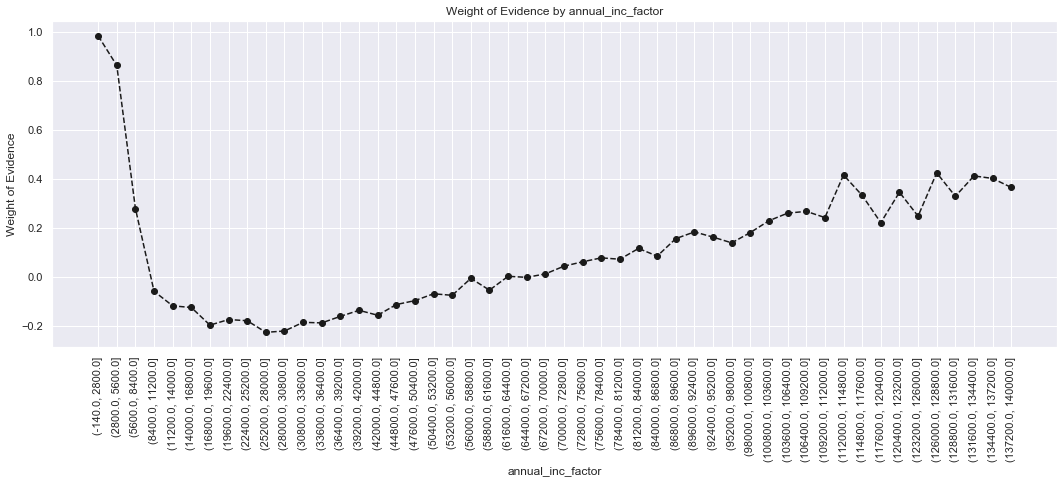

In [171]:
# We plot the weight of evidence values.
plot_by_woe(df_temp20, 90)

In [172]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [173]:
# mths_since_last_delinq variable
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


# We calculate weight of evidence.
df_temp21 = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp21

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.195, 3.9]",26204,0.847619,0.029734,22211.0,3993.0,0.029064,0.034103,-0.159869,NaN,NaN,inf
1,"(3.9, 7.8]",58907,0.856027,0.066842,50426.0,8481.0,0.065985,0.072433,-0.093235,0.008409,0.066634,inf
2,"(7.8, 11.7]",62507,0.860032,0.070927,53758.0,8749.0,0.070345,0.074722,-0.060361,0.004004,0.032875,inf
3,"(11.7, 15.6]",64902,0.858957,0.073644,55748.0,9154.0,0.072949,0.078181,-0.069263,0.001075,0.008902,inf
4,"(15.6, 19.5]",60274,0.865697,0.068393,52179.0,8095.0,0.068279,0.069137,-0.012480,0.006740,0.056783,inf
5,"(19.5, 23.4]",58195,0.869628,0.066034,50608.0,7587.0,0.066223,0.064798,0.021760,0.003931,0.034240,inf
6,"(23.4, 27.3]",57506,0.868083,0.065252,49920.0,7586.0,0.065323,0.064789,0.008204,0.001545,0.013556,inf
7,"(27.3, 31.2]",54412,0.866868,0.061741,47168.0,7244.0,0.061722,0.061869,-0.002371,0.001216,0.010575,inf
8,"(31.2, 35.1]",51456,0.872707,0.058387,44906.0,6550.0,0.058762,0.055941,0.049193,0.005839,0.051564,inf
9,"(35.1, 39.0]",49172,0.871167,0.055796,42837.0,6335.0,0.056055,0.054105,0.035399,0.001540,0.013794,inf


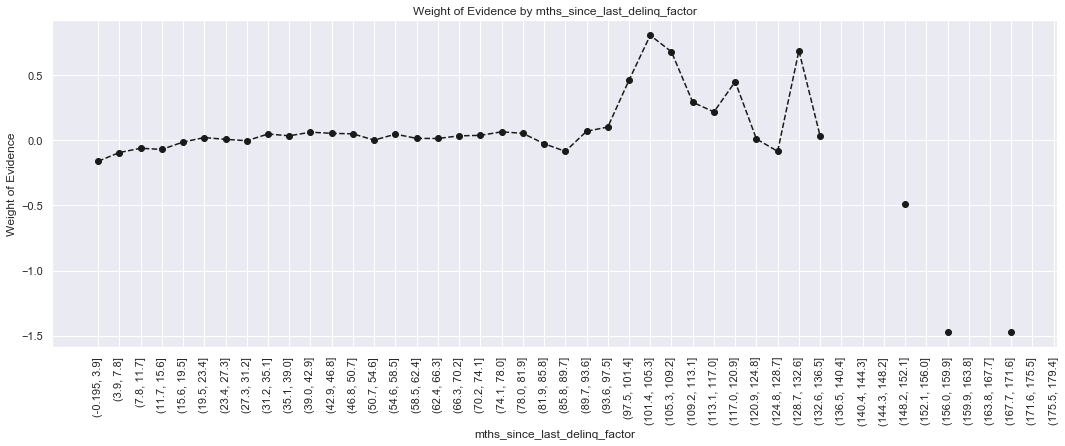

In [174]:
# We plot the weight of evidence values.
plot_by_woe(df_temp21, 90)

In [175]:
# We create the following Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [176]:
# dti variable
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)

# We calculate weight of evidence.
df_temp22 = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp22

C:\Users\13134\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\13134\anaconda3\lib\site-packages\pandas\core\algorithms.py:1926: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2.0, 9.0]",268406,0.904372,1.485226e-01,242739.0,25667.0,1.536362e-01,0.112964,0.307514,NaN,NaN,inf
1,"(9.0, 19.0]",723619,0.887561,4.004149e-01,642256.0,81363.0,4.065014e-01,0.358091,0.126799,0.016811,0.180714,inf
2,"(19.0, 29.0]",580640,0.857891,3.212974e-01,498126.0,82514.0,3.152776e-01,0.363157,-0.141382,0.029670,0.268181,inf
3,"(29.0, 39.0]",206556,0.831895,1.142979e-01,171833.0,34723.0,1.087578e-01,0.152821,-0.340146,0.025996,0.198764,inf
4,"(39.0, 49.0]",16249,0.870330,8.991392e-03,14142.0,2107.0,8.950860e-03,0.009273,-0.035383,0.038435,0.304763,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(949.0, 959.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
96,"(959.0, 969.0]",1,1.000000,5.533505e-07,1.0,0.0,6.329274e-07,0.000000,inf,NaN,NaN,inf
97,"(969.0, 979.0]",1,1.000000,5.533505e-07,1.0,0.0,6.329274e-07,0.000000,inf,0.000000,NaN,inf
98,"(979.0, 989.0]",0,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


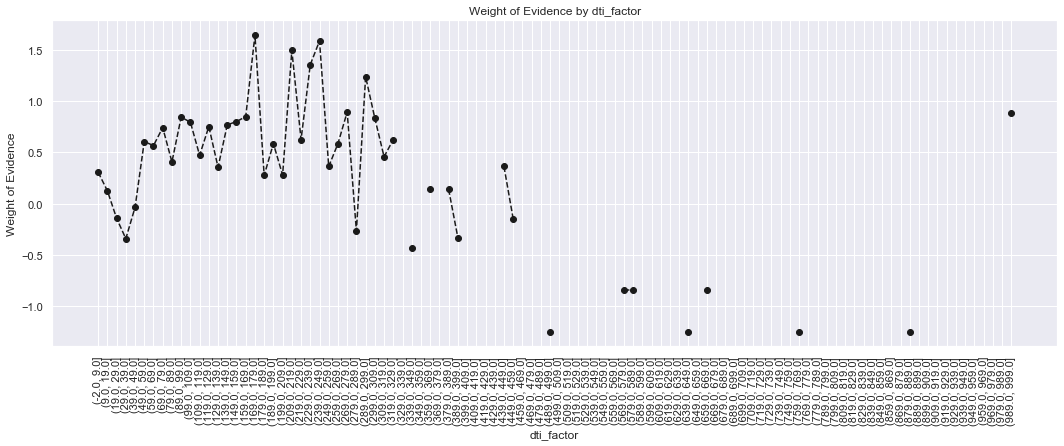

In [177]:
# We plot the weight of evidence values.
plot_by_woe(df_temp22, 90)

In [178]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [179]:
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


# We calculate weight of evidence.
df_temp22 = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp22

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-1.036, -0.28]",1,1.000000,5.743340e-07,1.0,0.0,6.565432e-07,0.000000,inf,NaN,NaN,inf
1,"(-0.28, 0.44]",3455,0.893488,1.984324e-03,3087.0,368.0,2.026749e-03,0.001688,0.182928,0.106512,inf,inf
2,"(0.44, 1.16]",7483,0.900441,4.297742e-03,6738.0,745.0,4.423788e-03,0.003417,0.258190,0.006953,0.075262,inf
3,"(1.16, 1.88]",9522,0.897816,5.468809e-03,8549.0,973.0,5.612788e-03,0.004463,0.229241,0.002625,0.028949,inf
4,"(1.88, 2.6]",11613,0.905020,6.669741e-03,10510.0,1103.0,6.900269e-03,0.005059,0.310349,0.007205,0.081108,inf
5,"(2.6, 3.32]",14970,0.910154,8.597781e-03,13625.0,1345.0,8.945401e-03,0.006169,0.371568,0.005133,0.061219,inf
6,"(3.32, 4.04]",17627,0.906507,1.012379e-02,15979.0,1648.0,1.049090e-02,0.007559,0.327769,0.003647,0.043799,inf
7,"(4.04, 4.76]",20364,0.907042,1.169574e-02,18471.0,1893.0,1.212701e-02,0.008683,0.334095,0.000535,0.006326,inf
8,"(4.76, 5.48]",23126,0.904091,1.328205e-02,20908.0,2218.0,1.372701e-02,0.010173,0.299582,0.002951,0.034513,inf
9,"(5.48, 6.2]",26553,0.903212,1.525029e-02,23983.0,2570.0,1.574588e-02,0.011788,0.289495,0.000878,0.010087,inf


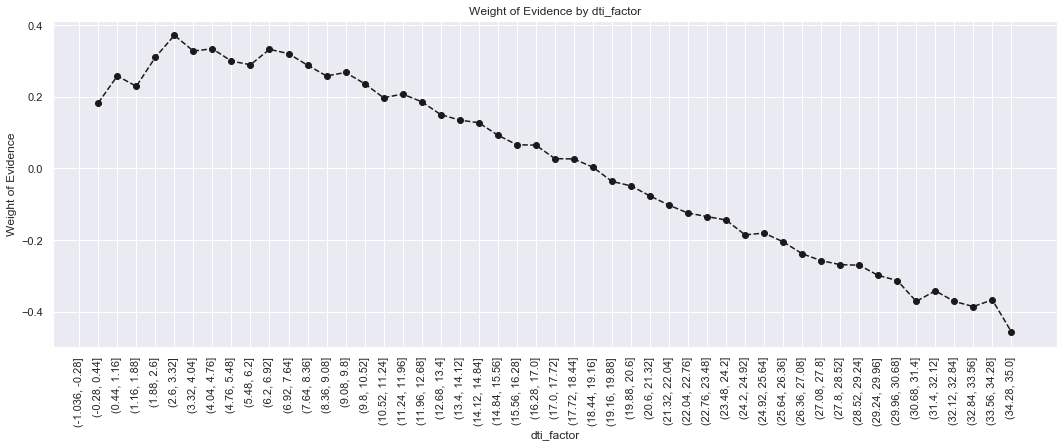

In [180]:
# We plot the weight of evidence values.
plot_by_woe(df_temp22, 90)


In [181]:
# We create the following Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [182]:
# mths_since_last_record variable
# We have to create one category for missing values and do fine and coarse classing for the rest.
#sum(loan_data_temp['mths_since_last_record'].isnull())

df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)

# We calculate weight of evidence.
df_temp23 = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp23

C:\Users\13134\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1315,0.758935,0.004585,998.0,317.0,0.004108,0.007220,-0.563755,NaN,NaN,0.008458
1,"(2.58, 5.16]",902,0.828160,0.003145,747.0,155.0,0.003075,0.003530,-0.137967,0.069224,0.425789,0.008458
2,"(5.16, 7.74]",844,0.835308,0.002943,705.0,139.0,0.002902,0.003166,-0.086883,0.007148,0.051084,0.008458
3,"(7.74, 10.32]",1576,0.829315,0.005495,1307.0,269.0,0.005381,0.006126,-0.129828,0.005993,0.042946,0.008458
4,"(10.32, 12.9]",1201,0.820150,0.004187,985.0,216.0,0.004055,0.004919,-0.193244,0.009165,0.063415,0.008458
5,"(12.9, 15.48]",1879,0.840873,0.006551,1580.0,299.0,0.006504,0.006810,-0.045870,0.020723,0.147373,0.008458
6,"(15.48, 18.06]",1994,0.847041,0.006952,1689.0,305.0,0.006953,0.006946,0.000973,0.006168,0.046844,0.008458
7,"(18.06, 20.64]",1525,0.849180,0.005317,1295.0,230.0,0.005331,0.005238,0.017580,0.002139,0.016607,0.008458
8,"(20.64, 23.22]",2440,0.834426,0.008507,2036.0,404.0,0.008382,0.009201,-0.093279,0.014754,0.110859,0.008458
9,"(23.22, 25.8]",1886,0.827678,0.006576,1561.0,325.0,0.006426,0.007402,-0.141350,0.006749,0.048071,0.008458


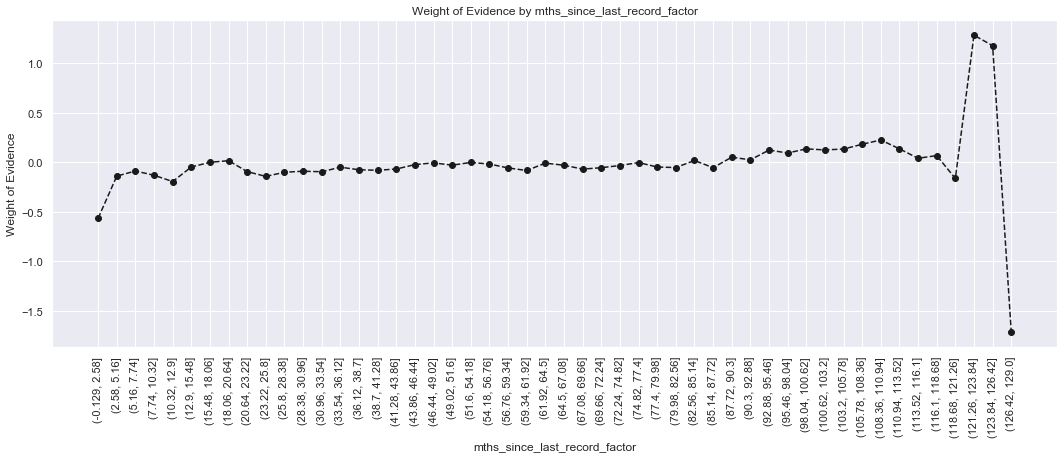

In [183]:
# We plot the weight of evidence values.
plot_by_woe(df_temp23, 90)


In [184]:
# We create the following Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)